In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [2]:
df = pd.read_csv("data/exp4/species_v1.csv")
df.head()

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,b,d_model,...,dropout,lr,model,n_layer,n_params,weight_decay,loss,test acc,train acc,val acc
0,MambaModel_s6_32768_[]_pretrained,finished,-,NaN,NaN,2024-05-01T19:10:55.000Z,4140,NaN,32,116,...,0,0.000313,MambaModel_s6_32768_[]_pretrained,6,586037,0,0.033410,0.991186,0.989036,0.982372
1,MambaModel_s6_1024_[]_pretrained,finished,-,NaN,NaN,2024-05-01T14:53:25.000Z,494,NaN,32,116,...,0,0.000200,MambaModel_s6_1024_[]_pretrained,6,586037,0,0.959883,0.585537,0.578105,0.575721
2,MambaModel_s6_1024_[]_BIMODULE,finished,-,NaN,NaN,2024-05-01T14:11:46.000Z,832,NaN,32,104,...,0,0.001000,MambaModel_s6_1024_[]_BIMODULE,6,564101,0,0.964051,0.581530,0.574164,0.570112
3,MambaModel_s6_1024_[],finished,-,NaN,NaN,2024-05-01T13:03:33.000Z,279,NaN,32,116,...,0,0.001000,MambaModel_s6_1024_[],6,586037,0,0.976624,0.578726,0.574524,0.583934
4,MambaModel s6_32768[],finished,-,NaN,NaN,2024-04-10T12:24:34.000Z,4070,NaN,32,116,...,0,0.000041,MambaModel s6_32768[],6,586856,0,0.061047,0.980769,0.982394,NaN


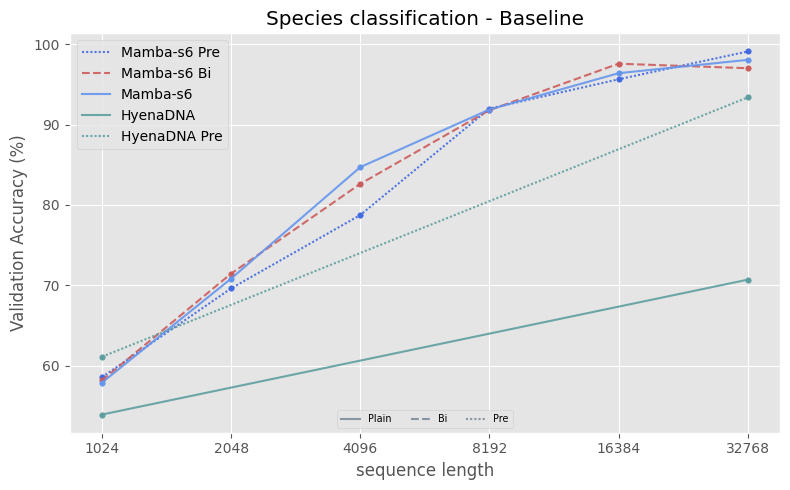

In [16]:
df = pd.read_csv("data/exp4/species_v1.csv")

sizes = [str(val) for val in [1024, 1024*2, 1024*4, 1024*8, 1024*16, 1024*32]]
types = ["pretrain", "BIMODULE", "Default"]
colors = ["royalblue", "indianred", "cornflowerblue"]
names = ["Mamba-s6 Pre", "Mamba-s6 Bi", "Mamba-s6"]
linestyles_ = [(0, (1, 1)), "dashed", "solid" ]
names = {type_:name for type_, name in zip(types, names)}
colors = {type_:name for type_, name in zip(types, colors)}
linestyles = {type_: ls for type_, ls in zip(types, linestyles_)}
fig, ax = plt.subplots(figsize=(8,5))
ls = [""]
accs = df["test acc"].values
for i, type_ in enumerate(types):
   if i < 2:
      l = [idx for idx, val in enumerate(df.Name.values.tolist()) if type_ in val]
      ls += l
   else:
      l = [idx for idx in list(range(len(df))) if idx not in ls]
   
   to_plot = []
   for size in sizes:
      for l_ in l:
         if size in df.iloc[l_, 0]:
            to_plot.append(accs[l_]*100)
            break

#   print(l)
   plt.plot(range(6), to_plot, label=names[type_], color=colors[type_], linestyle=linestyles[type_], alpha=0.9)
   plt.scatter(range(6), to_plot, color=colors[type_], s=15)#, label=names[type_] + " "+ str(accs[l_]*100)[:4], color=colors[type_], linestyle=linestyles[type_])
#print([(name, acc) for name, acc in zip(df.Name.values.tolist(), df["test acc"].values.tolist())])

lengths = [0, 5]#, 6]
hyena =     [53.9, 70.7]#, 65.7]
hyena_pre = [61.1, 93.4]#, 97.7]
#plt.axvline(97.7, linestyle='--', color='gray', alpha=0.5)

hyena_color = "cadetblue"
plt.plot(lengths, hyena, label="HyenaDNA", linestyle = "solid", color=hyena_color, alpha=0.9)
plt.scatter(lengths, hyena, color=hyena_color, s=15)
plt.plot(lengths, hyena_pre, label="HyenaDNA Pre", linestyle = (0, (1, 1)), color=hyena_color, alpha=0.9)
plt.scatter(lengths, hyena_pre, color=hyena_color, s=15)

plt.xticks(range(len(sizes)), sizes)
plt.ylabel("Validation Accuracy (%)", rotation=90)
plt.xlabel("sequence length")
plt.title("Species classification - Baseline")
plt.tight_layout()
plt.legend()

from matplotlib.lines import Line2D
legend = [
          Line2D([0], [0], linestyle="-" , label="Plain" , color="slategray", alpha=0.8),
          Line2D([0], [0], linestyle="dashed", label="Bi" , color="slategray", alpha=0.8) ,
          Line2D([0], [0], linestyle=(0, (1, 1)) , label="Pre" , color="slategray", alpha=0.8) ,

          #Line2D([0], [0], linestyle=(0, (3, 1, 1, 1)) , label="BD+Pre" , color="slategray", alpha=0.7) 
         ]
ax2 = ax.twinx()
ax2.axis("off")
ax2.legend(handles = legend, loc="lower center", ncol=4, fontsize = 'x-small')


plt.savefig("data/exp4/species_v1.png", dpi=200)
plt.show()


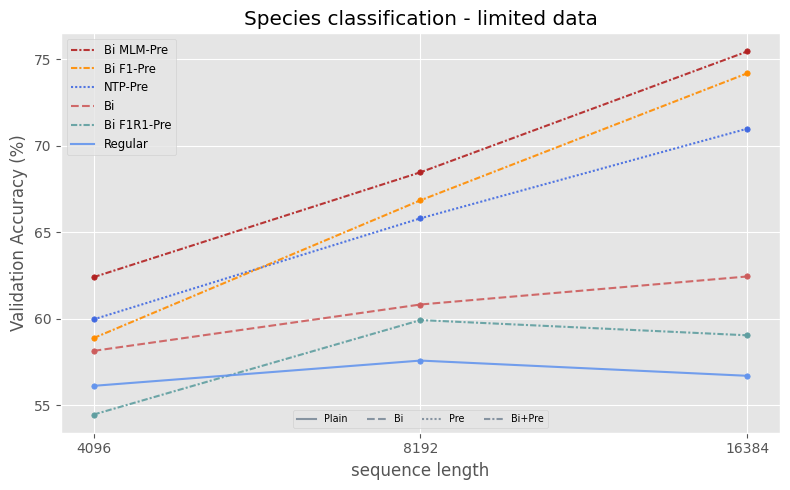

In [15]:
df = pd.read_csv("data/exp4/species_v4.csv")

sizes = [str(val) for val in [1024*4, 1024*8, 1024*16]]
types = ["]_pretrained", "]_BIMODULE", "]_BIMODULE_F1", "]_BIMODULE_F2R","]_BIMODULE_pretrained","Regular"]
colors_ = ["royalblue", "indianred", "darkorange", "cadetblue", "firebrick", "cornflowerblue"]
linestyles_ = [(0, (1, 1)), "dashed", (0, (3, 1, 1, 1)), (0, (3, 1, 1, 1)), (0, (3, 1, 1, 1)), "solid" ]
names_ = ["NTP-Pre", "Bi", "Bi F1-Pre", "Bi F1R1-Pre","Bi MLM-Pre", "Regular"]
names = {type_:name for type_, name in zip(types, names_)}
colors = {type_:name for type_, name in zip(types, colors_)}
linestyles = {type_: ls for type_, ls in zip(types, linestyles_)}
#fig, ax = plt.subplots(figsize=(8,5))
fig, ax = plt.subplots(figsize=(8,5))
ls = [""]
accs = df["test acc"].values
final_accs = []
for i, type_ in enumerate(types):
   if i < (len(types)-1):
      l = [idx for idx, val in enumerate(df.Name.values.tolist()) if val.endswith(type_)]
      ls += l
   else:
      l = [idx for idx in list(range(len(df))) if idx not in ls]
   
   to_plot = []
   for size in sizes:
      for l_ in l:
         if size in df.iloc[l_, 0]:
            to_plot.append(accs[l_]*100)
            if size == str(1024*16):
               final_accs.append(accs[l_])
            break

#   print(l)
   ax.plot(to_plot, label=names[type_], color=colors[type_],linestyle = linestyles[type_], alpha=0.9)
   ax.scatter(range(len(to_plot)), to_plot, color=colors[type_], s=15)
   
   from matplotlib.lines import Line2D

import numpy as np
accs_sorted = np.argsort(np.array(final_accs))[::-1]

legend1 = [Line2D([0], [0], 
                 linestyle = linestyles_[idx],
                 color=colors_[idx], 
                 label=names_[idx],#+ ",  ("+ str(final_accs[idx]*100)[:4]+")"
                 alpha=0.9
                 ) 
         for idx in accs_sorted]

legend = [
          Line2D([0], [0], linestyle="-" , label="Plain" , color="slategray", alpha=0.8),
             Line2D([0], [0], linestyle="dashed", label="Bi" , color="slategray", alpha=0.8) ,
          Line2D([0], [0], linestyle=(0, (1, 1)) , label="Pre" , color="slategray", alpha=0.8) ,
          Line2D([0], [0], linestyle=(0, (3, 1, 1, 1)) , label="Bi+Pre" , color="slategray", alpha=0.8) 
         ]

plt.xticks(range(len(sizes)), sizes)
plt.ylabel("Validation Accuracy (%)", rotation=90)
plt.xlabel("sequence length")
plt.title("Species classification - limited data")
plt.tight_layout()
ax.legend(handles = legend1, fontsize = 'small')
ax2 = ax.twinx()
ax2.axis("off")
ax2.legend(handles = legend, loc="lower center", ncol=4, fontsize = 'x-small')
plt.savefig("data/exp4/species_v4.png", dpi=200)
plt.show()
